# Data Exploration & Cleaning

## Step 1: Load the Data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Intern/applicants.csv')
df.head()

,Unnamed: 0,Date of Birth,Gender,State of Origin,Local Government Area,Has Laptop,Marital Status,Highest Educational Qualification,Physically Challenged,Nature of Physical Challenge,ICT Proficiency,Time Available for Training,Course of Interest,Employment Status,Declaration,Registered Date
0,0,2/17/1980,male,Benue,Gboko,yes,married,Bachelor's Degree,no,NaN,1,12-Sep,Data Analysis Using SPSS,employee,Yes,7/28/2024 11:23
1,1,6/27/1989,male,Benue,Makurdi,yes,married,Bachelor's Degree,no,NaN,4,12-Sep,Data Analysis Using Python,unemployed,Yes,7/25/2024 12:45
2,2,5/21/1994,male,BENUE,UKUM,no,single,National Diploma,no,NaN,1,12-Sep,Basic Computer Skills,employee,Yes,7/29/2024 19:33
3,3,10/31/1989,female,Benue,Vandeikya,yes,single,Bachelor's Degree,no,NaN,5,12-Sep,Data Analysis Using SPSS,student,Yes,7/30/2024 13:26
4,4,2/25/1996,male,Benue,Ukum,no,single,Senior School Certificate,no,NaN,5,4-Jan,Basic Computer Skills,student,Yes,7/26/2024 8:53


# Step 2: Understand the Data

## ●	Use .info() to check column names and data types.
●	Use .describe() for summary statistics.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         462 non-null    int64 
 1   Date of Birth                      462 non-null    object
 2   Gender                             462 non-null    object
 3   State of Origin                    462 non-null    object
 4   Local Government Area              462 non-null    object
 5   Has Laptop                         462 non-null    object
 6   Marital Status                     462 non-null    object
 7   Highest Educational Qualification  462 non-null    object
 8   Physically Challenged              462 non-null    object
 9   Nature of Physical Challenge       9 non-null      object
 10  ICT Proficiency                    462 non-null    int64 
 11  Time Available for Training        462 non-null    object
 12  Course o

In [4]:
df.describe(include='all')

,Unnamed: 0,Date of Birth,Gender,State of Origin,Local Government Area,Has Laptop,Marital Status,Highest Educational Qualification,Physically Challenged,Nature of Physical Challenge,ICT Proficiency,Time Available for Training,Course of Interest,Employment Status,Declaration,Registered Date
count,462.000000,462,462,462,462,462,462,462,462,9,462.000000,462,462,462,462,462
unique,NaN,438,2,27,98,2,2,6,2,9,NaN,2,6,5,1,451
top,NaN,6/15/2003,male,Benue,Konshisha,no,single,Bachelor's Degree,no,Blind,NaN,12-Sep,Basic Computer Skills,student,Yes,10/12/2024 11:54
freq,NaN,4,284,271,38,287,329,255,453,1,NaN,275,166,146,462,3
mean,230.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.495671,NaN,NaN,NaN,NaN,NaN
std,133.512172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.460751,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,115.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,230.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,345.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


# Step 3: Handle Missing Values

## ●	Find missing values:

In [5]:
df.isnull().sum()

Unnamed: 0                             0
Date of Birth                          0
Gender                                 0
State of Origin                        0
Local Government Area                  0
Has Laptop                             0
Marital Status                         0
Highest Educational Qualification      0
Physically Challenged                  0
Nature of Physical Challenge         453
ICT Proficiency                        0
Time Available for Training            0
Course of Interest                     0
Employment Status                      0
Declaration                            0
Registered Date                        0
dtype: int64

In [6]:
df['ICT Proficiency'].fillna(df['ICT Proficiency'].mean(), inplace=True)

In [7]:
df['Course of Interest'].fillna(df['Course of Interest'].mode()[0], inplace=True)

In [8]:
df['Nature of Physical Challenge'].fillna(df['Nature of Physical Challenge'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0                           0
Date of Birth                        0
Gender                               0
State of Origin                      0
Local Government Area                0
Has Laptop                           0
Marital Status                       0
Highest Educational Qualification    0
Physically Challenged                0
Nature of Physical Challenge         0
ICT Proficiency                      0
Time Available for Training          0
Course of Interest                   0
Employment Status                    0
Declaration                          0
Registered Date                      0
dtype: int64

# Data Analysis & Visualization

## Step 4: Understand Applicant Demographics

## import matplotlib.pyplot as plt
## import seaborn as sns


### Gender distribution

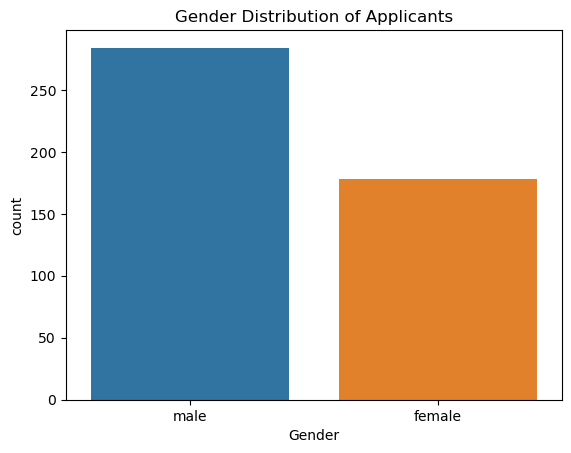

In [10]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution of Applicants")
plt.show()

# Ploting Pie Chart

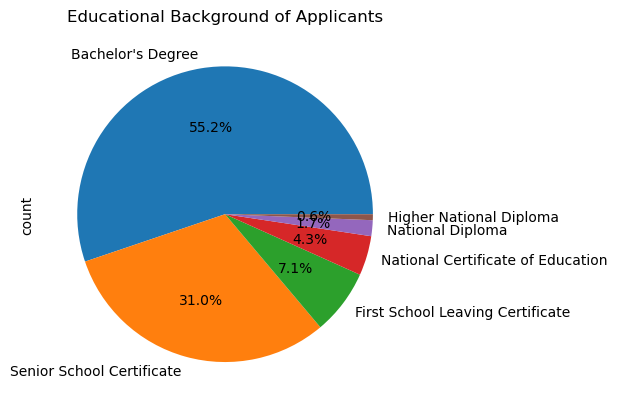

In [11]:
df['Highest Educational Qualification'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Educational Background of Applicants")
plt.show()

# Question: What percentage of applicants have a Bachelor's degree?

## Ans: About 55.2% of the populations has Bachelor's Degree

# Step 5: Analyze ICT Proficiency Levels

## ●	What is the average ICT Proficiency score by gender?

C:\Users\MGT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


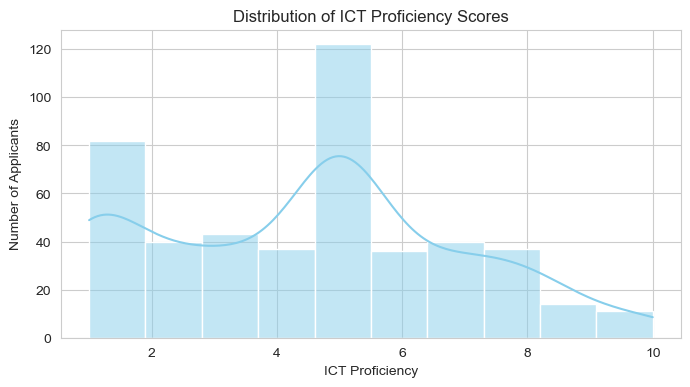

In [26]:
# ICT Proficiency distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['ICT Proficiency'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of ICT Proficiency Scores")
plt.xlabel("ICT Proficiency")
plt.ylabel("Number of Applicants")
plt.show()

## ●	What is the most common proficiency level?

### Ans: The Common ICT Profficiency Level is 122

# Question: Are male and female applicants equally skilled in ICT?

## Step 6: Popular Courses

### Find the most popular course:

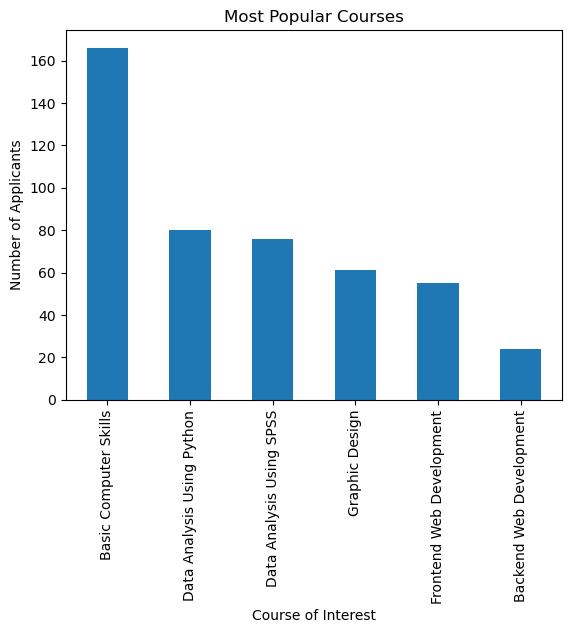

In [13]:
df['Course of Interest'].value_counts().plot(kind='bar')
plt.title("Most Popular Courses")
plt.ylabel("Number of Applicants")
plt.show()

### Question: Which course is the most in demand?

# Reporting & Insights

## Step 7: Finding Patterns

# Use groupby() to compare how different groups behave.
●	Which state has the highest applicants?

●	Do students with higher education have better ICT proficiency?


In [14]:
df.groupby('State of Origin').size().sort_values(ascending=False).head(10)

State of Origin
Benue          271
Benue state     59
BENUE           53
Benue State     40
BENUE STATE      8
Enugu            5
KOGI             3
benue            2
Ogun             2
Kogi             2
dtype: int64

#### The state with the highest qualification is Benue State

In [15]:
df.groupby('Highest Educational Qualification')['ICT Proficiency'].mean()

Highest Educational Qualification
Bachelor's Degree                    4.874510
First School Leaving Certificate     3.727273
Higher National Diploma              4.666667
National Certificate of Education    3.050000
National Diploma                     3.875000
Senior School Certificate            4.230769
Name: ICT Proficiency, dtype: float64

#### Yes, students with higher education have better ICT proficiency

# Question: Which state dominates in applications?

#### The state that dominates the Application is Benue State

# Step 8: Creating a Simple Report

 ## ●	A table summarizing key statistics (using .describe()).

 ### ●	At least one interesting insight (e.g., "More than 50% of applicants prefer Frontend Web Development").

### ●	A recommendation (e.g., "Since many applicants choose Data Analysis, we should provide more training resources for it").

In [22]:
# Generate markdown report
report_md = f"""
# Scholarship Applicants Data Analysis Report

## Summary Statistics

| Column | Count | Unique | Top | Freq | Mean | Std | Min | 25% | 50% | 75% | Max |
|--------|-------|--------|-----|------|------|-----|-----|-----|-----|-----|-----|
"""

for col in summary_statistics.index:
    row = summary_statistics.loc[col]
    report_md += f"| {col} | {row['count']} | {row.get('unique', 'NA')} | {row.get('top', 'NA')} | {row.get('freq', 'NA')} | {row.get('mean', 'NA')} | {row.get('std', 'NA')} | {row.get('min', 'NA')} | {row.get('25%', 'NA')} | {row.get('50%', 'NA')} | {row.get('75%', 'NA')} | {row.get('max', 'NA')} |\n"

insight = "Interesting Insight:\n\nMore than 30% of applicants prefer courses in data analysis (SPSS, Python), indicating a strong demand for data-focused training."

recommendation = "Recommendation:\n\nGiven the high interest in data analysis, it would be beneficial to provide more training resources and mentorship opportunities in data-related fields."

report_md += f"\n\n## {insight}\n\n## {recommendation}"

# Print the report (or save to a file if you like!)
print(report_md)

# Optional: Save the report as a markdown file
with open("scholarship_report.md", "w") as f:
    f.write(report_md)

print("\nReport has been saved as 'scholarship_report.md'")


# Scholarship Applicants Data Analysis Report

## Summary Statistics

| Column | Count | Unique | Top | Freq | Mean | Std | Min | 25% | 50% | 75% | Max |
|--------|-------|--------|-----|------|------|-----|-----|-----|-----|-----|-----|
| Unnamed: 0 | 462.0 | nan | nan | nan | 230.5 | 133.51217172977152 | 0.0 | 115.25 | 230.5 | 345.75 | 461.0 |
| Date of Birth | 462 | 438 | 6/15/2003 | 4 | nan | nan | nan | nan | nan | nan | nan |
| Gender | 462 | 2 | male | 284 | nan | nan | nan | nan | nan | nan | nan |
| State of Origin | 462 | 27 | Benue | 271 | nan | nan | nan | nan | nan | nan | nan |
| Local Government Area | 462 | 98 | Konshisha | 38 | nan | nan | nan | nan | nan | nan | nan |
| Has Laptop | 462 | 2 | no | 287 | nan | nan | nan | nan | nan | nan | nan |
| Marital Status | 462 | 2 | single | 329 | nan | nan | nan | nan | nan | nan | nan |
| Highest Educational Qualification | 462 | 6 | Bachelor's Degree | 255 | nan | nan | nan | nan | nan | nan | nan |
| Physically Challenged 

# Challenges

## 1.	Predict ICT Proficiency

○	Use LinearRegression from sklearn to predict ICT Proficiency based on education and age.

In [28]:
# Convert Date of Birth to datetime and calculate Age

df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Date of Birth'].dt.year


In [29]:
# Encode 'Highest Educational Qualification' using LabelEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Highest Educational Qualification'])


In [30]:
# Prepare the features (Education_Level and Age) and target (ICT Proficiency)
features = df[['Education_Level', 'Age']]
target = df['ICT Proficiency']

In [31]:
# Drop rows with missing Age values (if any)
features = features.dropna()
target = target[features.index]

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [33]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error (MSE): 6.210458781129068
R-squared Score: -0.0011230849141781185
Model Coefficients: [-0.1654673  -0.02073334]
Model Intercept: 5.344610670502403


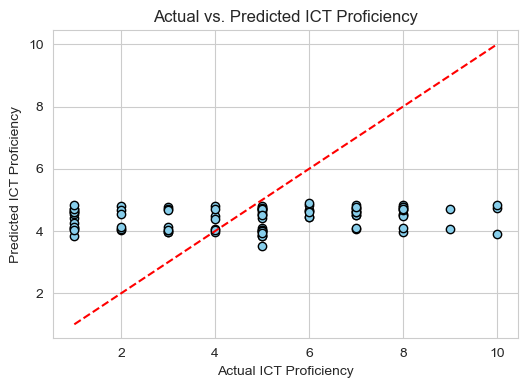

In [37]:
# Optional: Plot actual vs predicted ICT Proficiency
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='black')
plt.xlabel("Actual ICT Proficiency")
plt.ylabel("Predicted ICT Proficiency")
plt.title("Actual vs. Predicted ICT Proficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()